## Capstone Project
## Where to open a Greek restaurant in New York?
**by Ronald Vieira**
***
### Introduction
Greek cuisine is the cuisine of Greece and the Greek diaspora. In common with many other cuisines of the Mediterranean, it is founded on the triad of wheat, olive oil, and wine.  It uses vegetables, olive oil, grains, fish, and meat, including pork, poultry, veal and beef, lamb, rabbit, and goat. 
	New York City is commonly known as one of the most popular multicultural centers of the Earth.  Moreover, its economic growth and perspectives attract businesses, families and individuals from all over the world; therefore, the city’s diversity is not only being supported but also achieving new heights.  With almost 200,000 NYC inhabitants reporting Greek ancestry, the need to find and enjoy Greek cuisine is on the rise.
	Location is the key factor when opening a venue.  The pandemic caused by Covid-19 caused the population to move less and to use places near their homes such bakeries, supermarkets, drugstores and restaurants.  Despite the lockdown and virus consequences, it is possible to find opportunities in the middle of the pandemic and one of them is to open the right business in the right neighborhood.
	Prior to opening a Greek restaurant in any community, it's a good idea to determine how many competitors exist.  It is also important to gain knowledge of how existing firms have positioned themselves in the marketplace, and then design the business in a way that sets the entrepreneur apart from the others.  This report explores which neighborhoods and boroughs of New York City have the most as well as the best Greek restaurants to answer the main question: **Where should I open a Greek restaurant in New York City?**


### Data Section
In order to determine the possible options for opening a new restaurant, the data on New York City neighborhoods and boroughs **to include boundaries, latitudes, longitudes, restaurants, restaurant ratings and tips** are required:
* New York City data containing the neighborhoods and boroughs, latitudes, and longitudes will be obtained from the data source: https://cocl.us/new_york_dataset;
* All data related to locations and quality of Greek restaurants will be obtained via the FourSquare API utilized via the Request library in Python.

### Methodology Section
* Data will be collected from https://cocl.us/new_york_dataset, cleaned and processed into a dataframe;
* FourSquare API will be used to locate all venues;
* Greek restaurants will be extracted from these venues;
* Ratings, tips, and likes by users will be counted and added to the dataframe;
* Data will be sorted based on rankings;
* Finally, the data will be visually assessed using graphing tools from various Python libraries.

### Problem Statement (Summary)
* What are the best locations for Greek cuisine in New York City?
* In which neighborhood and/or borough should I open an Greek restaurant to have the best chance of being successful?

### Analysis Section
#### Loading all important libraries

In [1]:
import pandas as pd    # data analysis library
import numpy as np     # fundamental package for scientific computing 
import requests        # HTTP library
import os              # operating system interfaces

!pip install folium
import folium          # package to visualize data on a leaflet map 

!pip install geopy
from geopy.geocoders import Nominatim   # geocoding software

import matplotlib.pyplot as plt         # plotting library
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns  # statistical data visualization library

print('Done!')

You should consider upgrading via the 'C:\PortApps\WinPython\python-3.8.3.amd64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\PortApps\WinPython\python-3.8.3.amd64\python.exe -m pip install --upgrade pip' command.


Done!


#### Defining key variables

In [14]:
# @hidden_cell
CLIENT_ID = 'CLIENT_ID' # your FourSquare ID
CLIENT_SECRET = 'CLIENT_SECRET' # your FourSquare Secret
VERSION = '20181020' # FourSquare API version

#### Defining functions to be used

In [3]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent = "foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude, longitude


def get_venues(lat, lng):
    # set variables
    radius = 400
    LIMIT = 100
    # URL to fetch data from FourSquare API
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data = results["response"]["groups"][0]['items']
    venue_details = []
    for row in venue_data:
        try:
            venue_id = row['venue']['id']
            venue_name = row['venue']['name']
            venue_category = row['venue']['categories'][0]['name']
            venue_details.append([venue_id, venue_name, venue_category])
        except KeyError:
            pass
    column_names = ['ID','Name','Category']
    df = pd.DataFrame(venue_details, columns = column_names)
    return df


def get_venue_details(venue_id):
    # URL to fetch data from FourSquare API
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    venue_data = results['response']['venue']
    venue_details = []
    try:
        venue_id = venue_data['id']
        venue_name = venue_data['name']
        venue_likes = venue_data['likes']['count']
        venue_rating = venue_data['rating']
        venue_tips = venue_data['tips']['count']
        venue_details.append([venue_id, venue_name, venue_likes, venue_rating, venue_tips])
    except KeyError:
        pass
    column_names = ['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details, columns = column_names)
    return df


def get_new_york_data():
    url = 'https://cocl.us/new_york_dataset'
    response = requests.get(url).json()
    # all data is present in features label
    features = response['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns = column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index = True)
    return new_york_data

#### Getting data of New York City

In [4]:
nyc_data = get_new_york_data()
print('There are', nyc_data.shape[0], 'rows and', nyc_data.shape[1], 'columns')
nyc_data.head()

There are 306 rows and 4 columns


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


#### Visualizing bar chart «Neighborhoods per Borough: NYC»

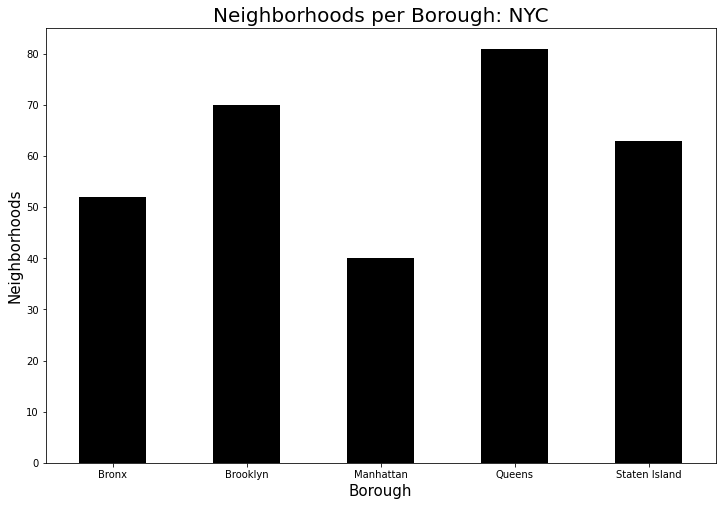

In [5]:
color = "black"
nyc_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize = (12,8), color = color)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

* We can see that **the highest** number of neigborhoods is in **Queens** and **the lowest** is in **Manhattan**.

#### Preparing neighborhood list that contains Greek restaurants

In [15]:
column_names = ['Borough', 'Neighborhood', 'ID', 'Name']
gr_rest = pd.DataFrame(columns = column_names)
count = 1
for row in nyc_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude = row
    venues = get_venues(Latitude, Longitude)
    greek_restaurants = venues[venues['Category'] == 'Greek Restaurant']
    for restaurant_detail in greek_restaurants.values.tolist():
        id, name, category = restaurant_detail
        gr_rest = gr_rest.append({'Borough': Borough,
                               'Neighborhood': Neighborhood, 
                               'ID': id,
                               'Name' : name}, ignore_index = True)
    count += 1


gr_rest.to_csv('gr_rest.csv') # save the information so far to a .csv file due to limited calls on FourSquare
gr_rest = pd.read_csv('gr_rest.csv', index_col = 0)
print('There are', gr_rest.shape[0], 'rows and', gr_rest.shape[1], 'columns')
gr_rest.head()

There are 32 rows and 4 columns


,Borough,Neighborhood,ID,Name
0,Bronx,Fordham,4c8801830f3c236a2d4bef5c,Gyro King
1,Brooklyn,Bay Ridge,58fa85be98fbfc397bafe21f,Blue Door Souvlakia
2,Brooklyn,Bay Ridge,4bbce66da0a0c9b6b9f41a0f,Elia Restaurant
3,Brooklyn,Windsor Terrace,545cf830498ee931999c6d38,Greek Xpress
4,Brooklyn,Prospect Heights,5ad35db3dd70c54b66147664,Underhill Greek Eatery


#### Visualizing bar chart «Greek Restaurants per Borough: NYC»

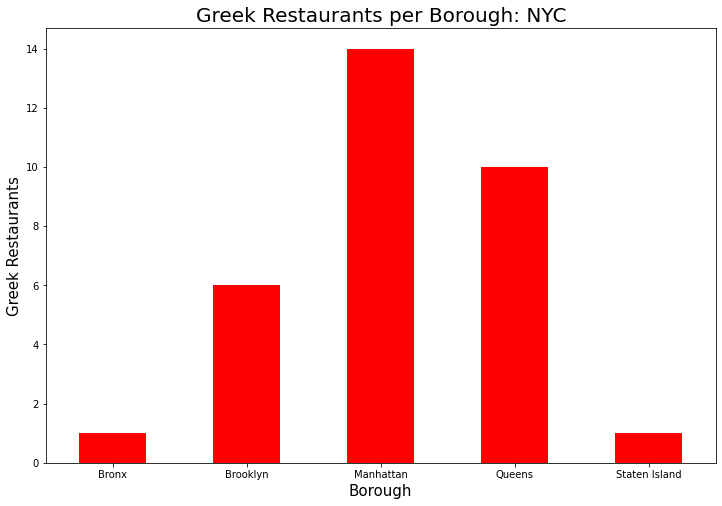

In [18]:
color = "red"
gr_rest.groupby('Borough')['ID'].count().plot.bar(figsize = (12,8), color = color)
plt.title('Greek Restaurants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Greek Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

* We can see that **the highest** number of Greek restaurants is in **Manhattan** and **the lowest** is in **Bronx** and **Staten Island**;
* Recall that **the highest** number of neighborhoods is in **Queens** and **the lowest** is in **Manhattan**.

#### Visualizing bar chart «Greek Restaurants per Neighborhood: NYC»

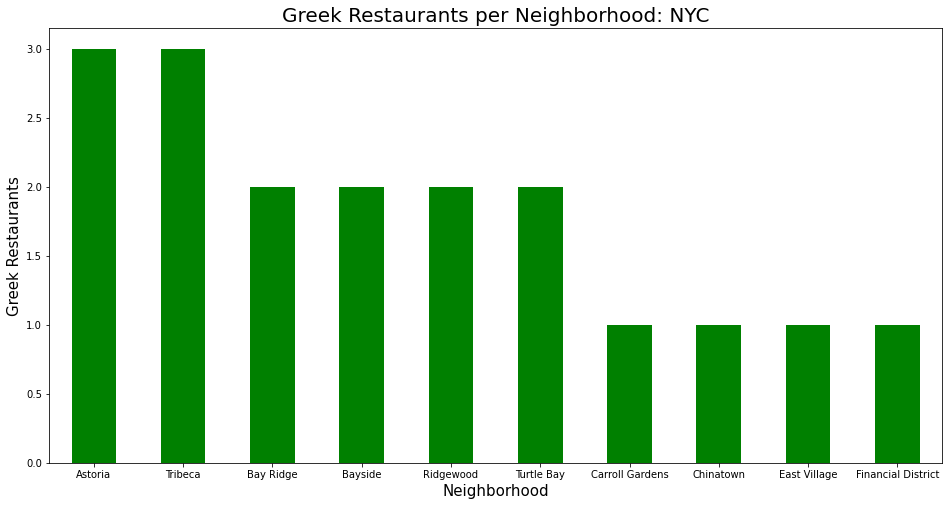

In [21]:
top_10 = 10 # top number for graphing
color = "green"
gr_rest.groupby('Neighborhood')['ID'].count().nlargest(top_10).plot.bar(figsize=(16,8), color=color)
plt.title('Greek Restaurants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Greek Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

* We can see that **the highest** number of Greek restaurants is in **Astoria** and **Tribeca** which are neigborhoods of **Queens** and **Manhattan**, respectively.

#### Getting data of Greek restaurants in Astoria, Queens

In [22]:
astoria_gr_rest = gr_rest[gr_rest['Neighborhood'] == 'Astoria']
print('There are', astoria_gr_rest.shape[0], 'rows and', astoria_gr_rest.shape[1], 'columns')
astoria_gr_rest

There are 3 rows and 4 columns


,Borough,Neighborhood,ID,Name
16,Queens,Astoria,553ffa91498e2c76f06c0c03,SVL Bar
17,Queens,Astoria,4ba406b6f964a520317938e3,Crave Astoria
18,Queens,Astoria,4b0b36a5f964a520cb2e23e3,Gyro Uno


* We can see that there are **3 Greek restaurants** in **Astoria, Queens**.

#### Getting data of Greek restaurants in Tribeca, Manhattan

In [23]:
tribeca_gr_rest = gr_rest[gr_rest['Neighborhood'] == 'Tribeca']
print('There are', tribeca_gr_rest.shape[0], 'rows and', tribeca_gr_rest.shape[1], 'columns')
tribeca_gr_rest

There are 3 rows and 4 columns


,Borough,Neighborhood,ID,Name
11,Manhattan,Tribeca,51b3c734498e2c9c744309e6,The Greek
12,Manhattan,Tribeca,5a3b15a661e53b1bcdf5cd40,Greca
13,Manhattan,Tribeca,437d1980f964a520b62a1fe3,Thalassa


* We can see that there are **3 Greek restaurants** in **Tribeca, Manhattan**.

#### Getting data of Greek restaurants' reviews

In [24]:
column_names = ['Borough', 'Neighborhood', 'ID', 'Name', 'Likes', 'Rating', 'Tips']
gr_rest_st = pd.DataFrame(columns = column_names)
count = 1
for row in gr_rest.values.tolist():
    Borough, Neighborhood, ID, Name = row
    try:
        venue_details = get_venue_details(ID)
        id, name, likes, rating, tips = venue_details.values.tolist()[0]
    except IndexError:
        # We will assign 0 value for these restaurants as they may have been 
        # recently opened or their details do not exist in FourSquare Database
        id, name, likes, rating, tips = [0]*5
    gr_rest_st = gr_rest_st.append({'Borough': Borough,
                                'Neighborhood': Neighborhood, 
                                'ID': id,
                                'Name': name,
                                'Likes': likes,
                                'Rating': rating,
                                'Tips': tips}, ignore_index = True)
    count += 1


gr_rest_st.to_csv('gr_rest_st.csv') # save the information so far to a .csv file due to limited calls on FourSquare
gr_rest_st = pd.read_csv('gr_rest_st.csv', index_col = 0)
print('There are', gr_rest_st.shape[0], 'rows and', gr_rest_st.shape[1], 'columns')
gr_rest_st.head()

There are 32 rows and 7 columns


,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Fordham,4c8801830f3c236a2d4bef5c,Gyro King,10,5.9,13
1,Brooklyn,Bay Ridge,58fa85be98fbfc397bafe21f,Blue Door Souvlakia,8,7.6,6
2,Brooklyn,Bay Ridge,4bbce66da0a0c9b6b9f41a0f,Elia Restaurant,10,7.7,12
3,Brooklyn,Windsor Terrace,545cf830498ee931999c6d38,Greek Xpress,9,6.5,5
4,Brooklyn,Prospect Heights,5ad35db3dd70c54b66147664,Underhill Greek Eatery,9,7.4,3


#### Wrangling data of Greek restaurants' reviews

In [25]:
gr_rest_st.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       32 non-null     object 
 1   Neighborhood  32 non-null     object 
 2   ID            32 non-null     object 
 3   Name          32 non-null     object 
 4   Likes         32 non-null     int64  
 5   Rating        32 non-null     float64
 6   Tips          32 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.0+ KB


In [26]:
gr_rest_st['Likes'] = gr_rest_st['Likes'].astype('float64')
gr_rest_st['Tips'] = gr_rest_st['Tips'].astype('float64')

In [27]:
gr_rest_st.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       32 non-null     object 
 1   Neighborhood  32 non-null     object 
 2   ID            32 non-null     object 
 3   Name          32 non-null     object 
 4   Likes         32 non-null     float64
 5   Rating        32 non-null     float64
 6   Tips          32 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.0+ KB


In [28]:
gr_rest_st.describe()

,Likes,Rating,Tips
count,32.000000,32.000000,32.000000
mean,100.156250,7.465625,33.437500
std,185.110971,2.105999,53.484962
min,0.000000,0.000000,0.000000
25%,13.000000,7.575000,4.750000
50%,21.000000,7.950000,10.500000
75%,79.000000,8.425000,36.750000
max,832.000000,9.300000,204.000000


* We can see that **the mean rating** of all Greek restaurants in NYC is about **7.46 out of 10**;
* **The mean number of likes** is about **100**;
* **The mean number of tips** is about **33**.

#### Finding restaurant with maximum Likes

In [29]:
gr_rest_st.iloc[gr_rest_st['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                   Chinatown
ID              5521c2ff498ebe2368634187
Name                              Kiki's
Likes                                832
Rating                               9.3
Tips                                 204
Name: 7, dtype: object

#### Finding restaurant with maximum Ratings

In [30]:
gr_rest_st.iloc[gr_rest_st['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                   Chinatown
ID              5521c2ff498ebe2368634187
Name                              Kiki's
Likes                                832
Rating                               9.3
Tips                                 204
Name: 7, dtype: object

#### Finding restaurant with maximum Tips

In [31]:
gr_rest_st.iloc[gr_rest_st['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                   Chinatown
ID              5521c2ff498ebe2368634187
Name                              Kiki's
Likes                                832
Rating                               9.3
Tips                                 204
Name: 7, dtype: object

#### Finding average rating of Greek restaurants for each borough

In [32]:
borough_st = gr_rest_st.groupby('Borough', as_index = False).mean()[['Borough', 'Rating']]
borough_st.columns = ['Borough', 'Average Rating']
borough_st.sort_values(['Average Rating'], ascending=False)

,Borough,Average Rating
2,Manhattan,8.314286
1,Brooklyn,7.600000
3,Queens,7.100000
0,Bronx,5.900000
4,Staten Island,0.000000


#### Visualizing bar chart «Average Rating of Greek Restaurants for Each Borough»

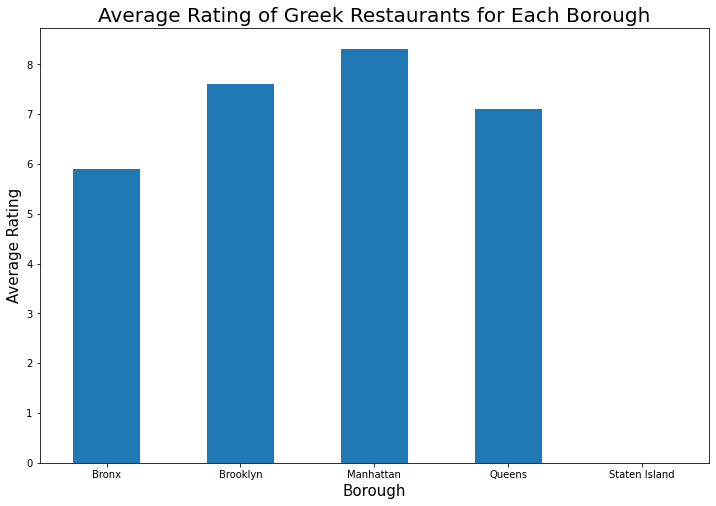

In [33]:
color = "blue"
gr_rest_st.groupby('Borough').mean()['Rating'].plot.bar(figsize = (12,8))
plt.title('Average Rating of Greek Restaurants for Each Borough', fontsize=20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

* We can see that **Manhattan** has **the highest** average rating and **Staten Island** has **the lowest**;
* **Overall average rating**, excluding Staten Island, is fluctuating **from 6 to 8**.

#### Finding top 10 of neighborhoods with the highest mean rating

In [34]:
neighborhood_st = gr_rest_st.groupby('Neighborhood', as_index = False).mean()[['Neighborhood', 'Rating']]
neighborhood_st.columns = ['Neighborhood', 'Average Rating']
neighborhood_st.sort_values(['Average Rating'], ascending=False).head(10)

,Neighborhood,Average Rating
4,Chinatown,9.30
22,Upper West Side,9.00
12,Noho,8.80
3,Carroll Gardens,8.80
5,East Village,8.80
2,Bayside,8.75
15,Roosevelt Island,8.40
20,Tribeca,8.30
10,Little Neck,8.20
21,Turtle Bay,8.15


* We can see that **the highest** average rating of Greek restaurants is in **Chinatown, Manhattan** which is **9.3**.

#### Creating map of the neighborhoods with an average rating greater than or equal to 7

In [35]:
neighborhood_st = neighborhood_st[neighborhood_st['Average Rating'] >= 7.0]
neighborhood_st = pd.merge(neighborhood_st, nyc_data, on = 'Neighborhood')
neighborhood_st = neighborhood_st[['Borough', 'Neighborhood', 'Latitude', 'Longitude', 'Average Rating']]
neighborhood_st['Average Rating'] = np.around(neighborhood_st['Average Rating'], 2)
neighborhood_st.head()

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Queens,Astoria,40.768509,-73.915654,7.87
1,Brooklyn,Bay Ridge,40.625801,-74.030621,7.65
2,Queens,Bayside,40.766041,-73.774274,8.75
3,Brooklyn,Carroll Gardens,40.680540,-73.994654,8.80
4,Manhattan,Chinatown,40.715618,-73.994279,9.30


In [36]:
# create map of NYC
nyc_map = folium.Map(location = geo_location('New York'), zoom_start = 12)
# instantiate a feature group for the restaurant ratings in the dataframe
ratings = folium.map.FeatureGroup()
# loop through the restaurant ratings and add each one to the ratings feature group
for lat, lng, in neighborhood_st[['Latitude', 'Longitude']].values:
    ratings.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius = 8, # define how big you want the circle markers to be
            color = 'black',
            fill = True,
            fill_color = 'red',
            fill_opacity = 0.7
        )
    )


neighborhood_st['Label'] = neighborhood_st['Neighborhood'] + ', ' + neighborhood_st['Borough'] + ' (' + neighborhood_st['Average Rating'].map(str) + ')'
# add pop-up text to each marker on the map
for lat, lng, label in neighborhood_st[['Latitude', 'Longitude', 'Label']].values:
    folium.Marker([lat, lng], popup = label).add_to(nyc_map)        
# add restaurant ratings to map
nyc_map.add_child(ratings)

In [39]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
ny_geo = r'Borough_Boundaries.geojson'

map = ny_map.choropleth(
    geo_data=ny_geo,
    data=borough_st,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)

# display map
# as this is huge map data , we will save it to a file
ny_map.save('borough_rating.html')

### Results and Conclusion Section
Let us sum up all ideas from this research:

It can be said that Manhattan is the best location for Greek cuisine in NYC. To have the best chance of success, I would recommend opening a Greek restaurant in Brooklyn. Brooklyn has neighborhoods with average ratings exceeding 7.0 of a scale of 1.0 to 10.0 and has lower number of Greek restaurants making competition easier than in other boroughs, such as Manhattan. Finally, I can consider Gyro King, Blue Door Souvlakia and Elia Restaurant as the most suitable places to try Greek cuisine. All the above research is highly depended on the adequacy and accuracy of FourSquare Database, therefore, a more comprehensive analysis and future work would need to incorporate data from other external databases.

The project went through the processes of identifying a problem, specifying the required data, extract, prepare the data and provide a recommendation based on result gathered data analysis. We must keep in mind that we only considered the frequency of occurrence factor and for further analysis we should use other factors to have a more precise recommendation.  The results of this project will help who wants to open a Greek restaurant in New York City.